In [59]:
import nselib
from nselib import capital_market
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

In [30]:
# Using investpy
# import datetime
# today = datetime.date.today().strftime('%d/%m/%Y')
# data = investpy.get_index_historical_data(index="Nifty 50", country= 'India',
#                                           from_date = '01/01/1990',
#                                           to_date = today)

# for having reliance data from very start 
#import datetime
# import pandas as pd
# today = datetime.date.today().strftime('%d-%m-%Y')
# reliance = capital_market.price_volume_and_deliverable_position_data(symbol= 'RELIANCE',  from_date='01-06-1800', to_date=today) 

# reliance['Date'] = pd.to_datetime(reliance['Date'])
# first_date = reliance['Date'].min().strftime('%d-%m-%Y')
# reliance = capital_market.price_volume_and_deliverable_position_data(symbol= 'RELIANCE',  from_date= first_date, to_date=today) 


In [31]:
# 20 years of data

today = datetime.date.today().strftime('%d-%m-%Y')
reliance = capital_market.price_volume_and_deliverable_position_data(symbol= 'RELIANCE',  from_date='01-06-2004', to_date=today) 
reliance = reliance.set_index('Date')
reliance.head()

c:\Users\HITESH KOTIAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\nselib\capital_market\capital_market_data.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nse_df = pd.concat([nse_df, data_df], ignore_index=True)


,Symbol,Series,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,%DlyQttoTradedQty
Date,,,,,,,,,,,,,,
01-Jun-2004,RELIANCE,EQ,429.8,435.0,443.0,432.15,432.55,434.2,438.45,"62,15,267","2,72,50,93,768.45",-,"12,28,368",19.76
02-Jun-2004,RELIANCE,EQ,434.2,435.9,442.95,434.6,442.5,439.45,438.37,"42,96,672","1,88,35,29,783.60",-,"7,93,496",18.47
03-Jun-2004,RELIANCE,EQ,439.45,446.0,452.2,423.1,425.0,428.35,439.86,"72,08,695","3,17,08,31,642.90",-,"11,86,608",16.46
04-Jun-2004,RELIANCE,EQ,428.35,423.0,435.0,422.6,434.8,433.5,429.54,"61,51,647","2,64,23,61,872.30",-,"8,15,123",13.25
07-Jun-2004,RELIANCE,EQ,433.5,435.0,449.6,435.0,449.1,444.8,443.49,"66,11,675","2,93,22,20,358.90",-,"17,50,006",26.47


In [32]:
# I like to see only open high low thus change name and remove Price 
reliance.rename(columns= lambda x : x.replace('Price',''), inplace= True)
reliance.head()

,Symbol,Series,PrevClose,Open,High,Low,Last,Close,Average,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,%DlyQttoTradedQty
Date,,,,,,,,,,,,,,
01-Jun-2004,RELIANCE,EQ,429.8,435.0,443.0,432.15,432.55,434.2,438.45,"62,15,267","2,72,50,93,768.45",-,"12,28,368",19.76
02-Jun-2004,RELIANCE,EQ,434.2,435.9,442.95,434.6,442.5,439.45,438.37,"42,96,672","1,88,35,29,783.60",-,"7,93,496",18.47
03-Jun-2004,RELIANCE,EQ,439.45,446.0,452.2,423.1,425.0,428.35,439.86,"72,08,695","3,17,08,31,642.90",-,"11,86,608",16.46
04-Jun-2004,RELIANCE,EQ,428.35,423.0,435.0,422.6,434.8,433.5,429.54,"61,51,647","2,64,23,61,872.30",-,"8,15,123",13.25
07-Jun-2004,RELIANCE,EQ,433.5,435.0,449.6,435.0,449.1,444.8,443.49,"66,11,675","2,93,22,20,358.90",-,"17,50,006",26.47


In [33]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5080 entries, 01-Jun-2004 to 30-Aug-2024
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Symbol               5080 non-null   object
 1   Series               5080 non-null   object
 2   PrevClose            5080 non-null   object
 3   Open                 5080 non-null   object
 4   High                 5080 non-null   object
 5   Low                  5080 non-null   object
 6   Last                 5080 non-null   object
 7   Close                5080 non-null   object
 8   Average              5080 non-null   object
 9   TotalTradedQuantity  5080 non-null   object
 10  TurnoverInRs         5080 non-null   object
 11  No.ofTrades          5080 non-null   object
 12  DeliverableQty       5080 non-null   object
 13  %DlyQttoTradedQty    5080 non-null   object
dtypes: object(14)
memory usage: 595.3+ KB


In [34]:
# Convert objects to integers

col_to_convert = reliance.columns[2:]
reliance[col_to_convert] = reliance[col_to_convert].replace({'[,,-]': ''}, regex=True).replace(' ', '', regex=True)
reliance[col_to_convert] = reliance[col_to_convert].apply(pd.to_numeric, errors = 'coerce')
reliance.index = pd.to_datetime(reliance.index, errors='coerce')


Text(0.5, 1.0, 'RELIANCE Stock value changes since 2004')

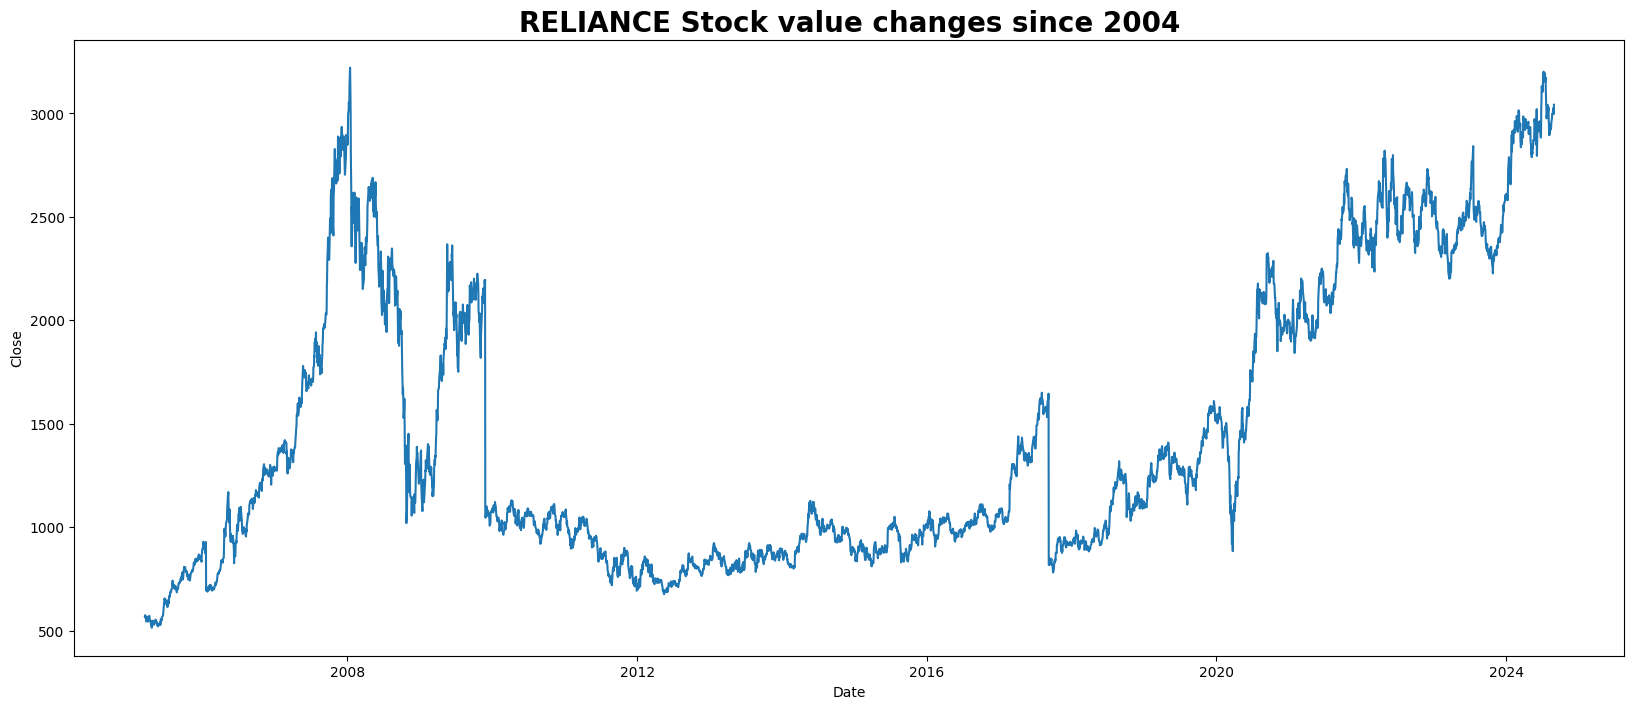

In [81]:
fig=plt.figure(figsize=(20,8))
ax=sn.lineplot(reliance, x = 'Date', y='Close')
plt.xticks(ha = 'center') # ha = horizontakalignment, va = verticalalignment
plt.title("RELIANCE Stock value changes since 2004", size=20, weight='bold')

In [36]:
#  delete columns which are no required 
reliance = reliance.drop(columns =['Average', 'TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', 'DeliverableQty', '%DlyQttoTradedQty'])
reliance.columns

Index(['Symbol', 'Series', 'PrevClose', 'Open', 'High', 'Low', 'Last',
       'Close'],
      dtype='object')

In [37]:
# We want to predict next day price thus create a tomorrow stock and a target which tells if price move up or down

reliance['tomorrow'] = reliance['Close'].shift(-1)
reliance['target'] = (reliance['tomorrow'] > reliance['Close']).astype(int)
reliance.head()

,Symbol,Series,PrevClose,Open,High,Low,Last,Close,tomorrow,target
Date,,,,,,,,,,
2004-06-01,RELIANCE,EQ,429.80,435.0,443.00,432.15,432.55,434.20,439.45,1
2004-06-02,RELIANCE,EQ,434.20,435.9,442.95,434.60,442.50,439.45,428.35,0
2004-06-03,RELIANCE,EQ,439.45,446.0,452.20,423.10,425.00,428.35,433.50,1
2004-06-04,RELIANCE,EQ,428.35,423.0,435.00,422.60,434.80,433.50,444.80,1
2004-06-07,RELIANCE,EQ,433.50,435.0,449.60,435.00,449.10,444.80,455.25,1


In [38]:

model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 50, 100],
    'max_features': ['sqrt', 'log2', None]
}
predictor = ['Open','High','Low','Last',"Close"]

X_train, X_val, y_train, y_val = train_test_split(reliance[predictor], reliance['target'], test_size=0.2, random_state=1, shuffle=False)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [39]:
train = reliance.iloc[:-250]
test = reliance.iloc[-250:]
predictor = ['Open','High','Low','Last',"Close"]
best_model.fit(train[predictor], train['target'])

RandomForestClassifier(max_depth=30, max_features=None, n_estimators=150,
                       random_state=1)

In [40]:
pred = best_model.predict(test[predictor])

In [41]:
pred = pd.Series(pred, index= test.index)
pred

Date
2023-08-31    1
2023-09-01    1
2023-09-04    1
2023-09-05    0
2023-09-06    0
             ..
2024-08-26    1
2024-08-27    1
2024-08-28    1
2024-08-29    0
2024-08-30    0
Length: 250, dtype: int32

In [42]:
precision_score(test['target'], pred)

0.5379746835443038

In [43]:
print(test['target'].value_counts())
print(pred.value_counts())

target
1    134
0    116
Name: count, dtype: int64
1    158
0     92
Name: count, dtype: int64


<Axes: xlabel='Date'>

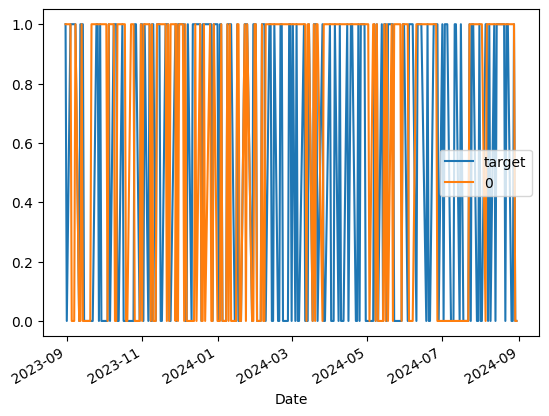

In [44]:
# Not a very good result we got as 50% is not the good result just see the graph
target_df = pd.concat([test['target'], pred],axis =1)
target_df.plot()

In [45]:
def predict(train, test, model, predictor):
    model.fit(train[predictor], train['target'])
    pred = model.predict(test[predictor])
    pred = pd.Series(pred, index= test.index, name= 'Predictions')
    combine = pd.concat([test['target'],pred],axis=1)
    return combine

In [46]:
def backtest(data, model, predictor, start=1008, step=252):
    all_prediction = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+(step)].copy()
        predictions = predict(train, test, predictor, model)
        all_prediction.append(predictions)
    return pd.concat(all_prediction)


In [47]:
model = best_model
predictor = ['Open','High','Low','Last',"Close"]

result = backtest(reliance, predictor, model)

In [48]:
precision_score(result['target'], result['Predictions'])

0.5064703257474342

In [49]:
print(result['Predictions'].value_counts() / result.shape[0])
print(result['target'].value_counts() / result.shape[0])

Predictions
1    0.550344
0    0.449656
Name: count, dtype: float64
target
1    0.502947
0    0.497053
Name: count, dtype: float64


In [50]:
#  Change the predict to predict_proba

def predict(train, test, model, predictor):
    model.fit(train[predictor], train['target'])
    pred = model.predict_proba(test[predictor])[:,1]
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    pred = pd.Series(pred, index= test.index, name= 'Predictions')
    combine = pd.concat([test['target'],pred],axis=1)
    return combine

diff_result = backtest(reliance, predictor, model)

In [51]:
precision_score(diff_result['target'], diff_result['Predictions'])

0.5091292134831461

In [52]:
# Lets take a moving average kind of data


horizon = [2,5,20,50,100,200]
new_predictor = []

for horizon in horizon:
    rolling_average = reliance['Close'].rolling(horizon).mean()

    ratio_column = f'Close_ratio-{horizon}'
    reliance[ratio_column] = reliance['Close'] / rolling_average


    trend_column = f'Trend-{horizon}'
    reliance[trend_column] = reliance['target'].shift(1).rolling(horizon).sum()
    new_predictor += [ratio_column, trend_column]

In [53]:
reliance.dropna(inplace=True)
reliance.head()

,Symbol,Series,PrevClose,Open,High,Low,Last,Close,tomorrow,target,...,Close_ratio-5,Trend-5,Close_ratio-20,Trend-20,Close_ratio-50,Trend-50,Close_ratio-100,Trend-100,Close_ratio-200,Trend-200
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-15,RELIANCE,EQ,579.00,580.00,584.1,569.20,570.55,570.85,574.30,1,...,0.977600,1.0,1.019707,11.0,1.056072,24.0,1.071607,50.0,1.133919,109.0
2005-03-16,RELIANCE,EQ,570.85,571.05,577.8,567.60,574.10,574.30,562.50,0,...,0.988094,2.0,1.022286,12.0,1.061258,24.0,1.077555,51.0,1.139246,109.0
2005-03-17,RELIANCE,EQ,574.30,569.00,574.8,558.25,559.40,562.50,571.85,1,...,0.978397,1.0,0.998912,11.0,1.038254,24.0,1.054953,51.0,1.114356,109.0
2005-03-18,RELIANCE,EQ,562.50,560.00,573.9,555.15,571.25,571.85,559.70,0,...,1.000262,2.0,1.012133,12.0,1.053882,25.0,1.071784,52.0,1.131328,109.0
2005-03-21,RELIANCE,EQ,571.85,573.00,576.8,558.00,558.35,559.70,544.70,0,...,0.985665,2.0,0.988424,11.0,1.030218,25.0,1.048856,51.0,1.106034,108.0


In [54]:
# here wont use previous predictor but the ratios we got i.e. ratio col and trend col
def predict(train, test, model, predictor):
    model.fit(train[predictor], train['target'])
    pred = model.predict_proba(test[predictor])[:,1]
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    pred = pd.Series(pred, index= test.index, name= 'Predictions')
    combine = pd.concat([test['target'],pred],axis=1)
    return combine

new_prediction = backtest(reliance, new_predictor, model)

In [55]:
precision_score(new_prediction['target'], new_prediction['Predictions'] )

0.5218508997429306

In [56]:
new_prediction['Predictions'].value_counts()

Predictions
0.0    3093
1.0     778
Name: count, dtype: int64